# import

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import nltk
import networkx as nx

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
not_needed = ['AU', 'BA', 'BF', 'CA', 'GP', 'SO', 'ID', 'CT', 'PU', 'PY', 'BE', 'SE', 'BS', 'CY' ,'CL', 'SP', 'HO', 'RP', 'EM', 
              'RI', 'OI', 'FU', 'FX', 'CR', 'TC', 'U1', 'U2', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 
              'VL', 'IS', 'SI', 'PN', 'SU', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'EA', 'GA', 'PM', 'UT', 
              'OA', 'HP', 'HC', 'DA', 'WC'] 

def to_df(directory, not_needed=not_needed):
    file_names = os.listdir(directory)
    data_frames = [pd.read_csv(directory+file_name, sep='\t',  engine='c', index_col=False, quotechar='^') for file_name in file_names] 
    print('Checking duplicates...')
    all_clear = True
    for i in range(len(data_frames)):
        for j in range(i+1, len(data_frames)):
            if str(data_frames[i].iloc[0,:]) == str(data_frames[j].iloc[0,:]):
                print('Duplicated dataframes:' + str(file_names[i]) +', '+str(file_names[j]))
                all_clear = False
    if all_clear:
        print('All clear')
    else:
        print('Check the files')
        
    concatenated = pd.concat(data_frames, ignore_index=True)
    if not_needed:
        concatenated.drop(columns=not_needed, inplace=True)
    concatenated.drop_duplicates(inplace=True)
    return concatenated

In [15]:
data = to_df('/content/drive/MyDrive/data/')

Checking duplicates...
All clear


In [16]:
data.to_excel("/content/drive/MyDrive/data.xlsx")


In [17]:
data = pd.read_excel('/content/drive/MyDrive/data.xlsx')

In [18]:
data.columns

Index(['Unnamed: 0', 'PT', 'AF', 'TI', 'LA', 'DT', 'DE', 'AB', 'C1', 'NR',
       'Z9', 'JI', 'PD', 'PG', 'SC'],
      dtype='object')

In [19]:
mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data.PD = data.PD.str[:3].str.capitalize()
data_w_date = data[data.PD.isin(mon)].copy()
data_w_date.PD = data_w_date.PD.apply(lambda x: datetime.strptime(x,'%b').strftime('2020-%m'))

In [20]:
len(data_w_date)

66570

In [21]:
len(data)

79996

# Document type

In [22]:
data.PT.dropna().value_counts()

J    79992
S        3
B        1
Name: PT, dtype: int64

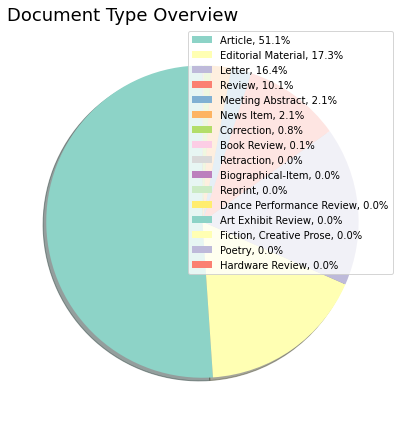

In [23]:
data_doc = data.DT.dropna().str.split(';').apply(lambda x: x[0]).value_counts().rename_axis('DocType').reset_index(name='Count')

with plt.style.context({'axes.prop_cycle' : plt.cycler('color', plt.cm.Set3.colors)}):
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    labels = data_doc.iloc[:,0]
    size = data_doc.iloc[:,1]/data_doc.iloc[:,1].sum()*100
    ax1.pie(data_doc.iloc[:,1], startangle=90, shadow=True)
    ax1.legend(labels =['%s, %1.1f%%' % (l,s) for l,s in zip(labels,size)])
    ax1.set_title('Document Type Overview', fontsize=18, loc='left')
    plt.tight_layout()
    plt.savefig('doc_type.jpg')
    plt.show()


In [24]:
len(data.DT.dropna().str.split(';').apply(lambda x: x[0]).value_counts())

16

# By language

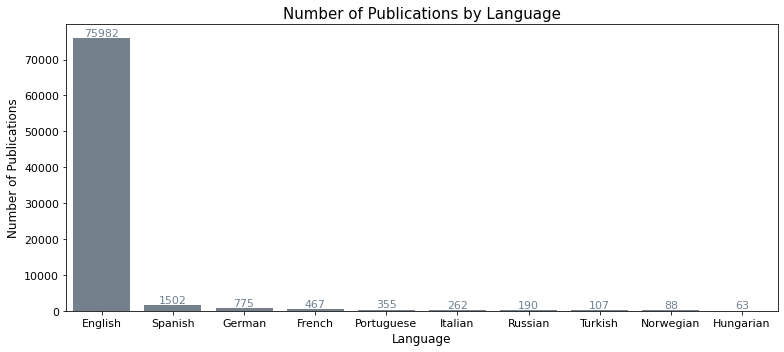

In [25]:
data_lang = data.LA.dropna().value_counts().rename_axis('Language').reset_index(name='Count')[0:10]

plt.figure(figsize=(11,5))
g = sns.barplot(x=data_lang.Language, y=data_lang.Count, color='slategrey')
plt.xlabel('Language',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')
plt.title('Number of Publications by Language', fontsize=15)
plt.tight_layout()
plt.savefig('doc_lang.jpg')
plt.show()

In [26]:
data.LA.dropna().value_counts()

English        75982
Spanish         1502
German           775
French           467
Portuguese       355
Italian          262
Russian          190
Turkish          107
Norwegian         88
Hungarian         63
Chinese           48
Polish            31
Czech             22
Icelandic         15
Catalan           13
Croatian          12
Ukrainian         11
Korean            10
Slovenian         10
Greek              9
Bulgarian          4
Dutch              3
Unspecified        3
Slovak             3
Japanese           2
Afrikaans          2
Indonesian         2
Lithuanian         2
Arabic             1
Swedish            1
Malay              1
Name: LA, dtype: int64

In [27]:
len(data.LA.dropna().value_counts())

31

# By source

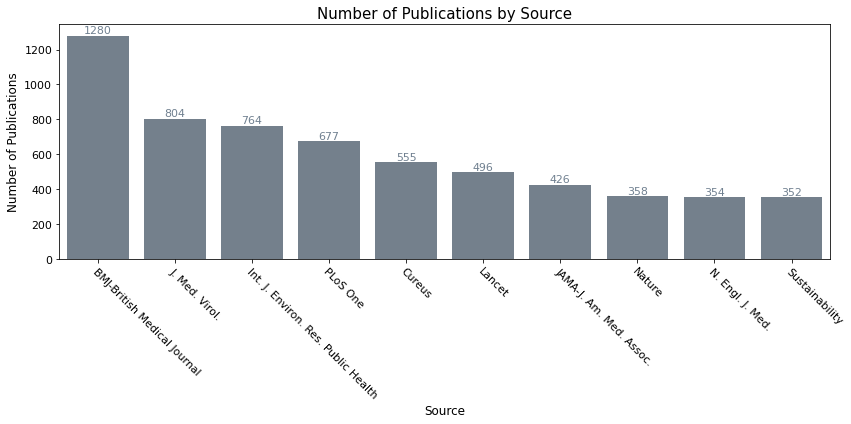

In [28]:
data_source = data.JI.dropna().value_counts().rename_axis('Title').reset_index(name='Count')[0:10]

plt.figure(figsize=(12,6))
g=sns.barplot(x=data_source.Title, y=data_source.Count, color='slategrey')
plt.xlabel('Source',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45, ha='left', rotation_mode='anchor')
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')
plt.title('Number of Publications by Source', fontsize=15)
plt.tight_layout()
plt.savefig('doc_source.jpg')
plt.show()

In [29]:
data.JI.dropna().value_counts()[:20]

BMJ-British Medical Journal            1280
J. Med. Virol.                          804
Int. J. Environ. Res. Public Health     764
PLoS One                                677
Cureus                                  555
Lancet                                  496
JAMA-J. Am. Med. Assoc.                 426
Nature                                  358
N. Engl. J. Med.                        354
Sustainability                          352
Int. J. Infect. Dis.                    329
Front. Public Health                    320
Crit. Care                              294
Front. Med.                             292
J. Med. Internet Res.                   290
Front. Psychol.                         290
Med. Hypotheses                         288
Dermatol. Ther.                         278
J. Clin. Med.                           278
J. Infect.                              276
Name: JI, dtype: int64

In [30]:
len(data.JI.dropna().value_counts())

7378

# Number of pages


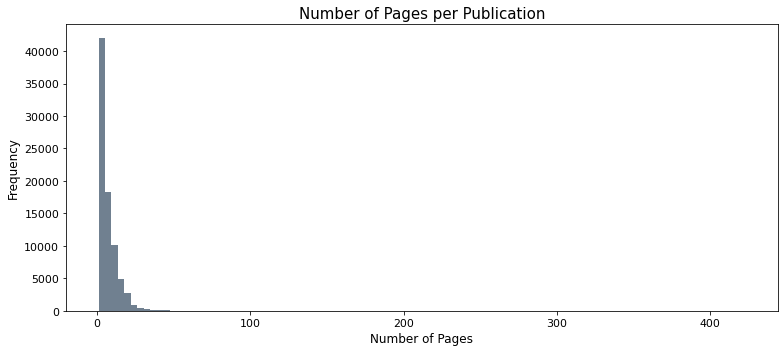

In [31]:
data_page = data.PG.dropna()

plt.figure(figsize=(11,5))
plt.hist(x=data_page, color='slategrey', bins=100)
plt.xlabel('Number of Pages',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Number of Pages per Publication', fontsize=15)
plt.tight_layout()
plt.savefig('doc_page.jpg')
plt.show()

In [32]:
max(data_page)

423

In [33]:
sorted(data_page)[-5:]

[161, 172, 293, 310, 423]

# By institution

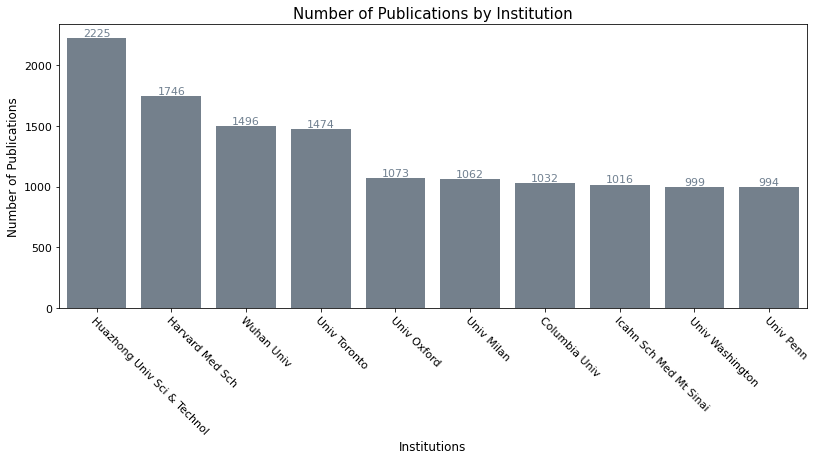

In [34]:
data_inst = data[['C1']].dropna()
data_inst.C1= data_inst.C1.apply(lambda x: re.findall(r"\] (.*?)\,", x))
data_inst_all = data_inst.explode('C1').C1.value_counts().rename_axis('Institutions').reset_index(name='Count')[0:10]


plt.figure(figsize=(11.5,6.5))
g=sns.barplot(x=data_inst_all.Institutions, y=data_inst_all.Count, color='slategrey')
plt.xlabel('Institutions',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45, ha='left', rotation_mode='anchor')
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')

plt.title('Number of Publications by Institution', fontsize=15)
plt.tight_layout()
plt.savefig('doc_inst.jpg')
plt.show()

In [35]:
data_inst.explode('C1').C1.value_counts()[:20]

Huazhong Univ Sci & Technol    2225
Harvard Med Sch                1746
Wuhan Univ                     1496
Univ Toronto                   1474
Univ Oxford                    1073
Univ Milan                     1062
Columbia Univ                  1032
Icahn Sch Med Mt Sinai         1016
Univ Washington                 999
Univ Penn                       994
Univ Tehran Med Sci             946
Stanford Univ                   903
Univ Calif San Francisco        885
UCL                             874
Univ Michigan                   853
Univ Sao Paulo                  849
Mayo Clin                       842
Johns Hopkins Univ              772
Fudan Univ                      754
Massachusetts Gen Hosp          750
Name: C1, dtype: int64

In [36]:
len(data_inst.explode('C1').C1.value_counts())

51512

# By country

In [37]:
data_country = data[['C1']].dropna()
data_country.C1 = data_country.C1.apply(lambda x: re.sub(r"\[(.*?)\] ", "", x).split('; ')).to_list()

data_country['country']=[list(set(i)) for i in [[j.split(', ')[-1] for j in i] for i in data_country.C1]] 

def replace(string):
  if 'USA' in string:
    return 'USA'
  elif 'North Ireland' in string:
    return 'UK'
  elif 'Wales' in string:
    return 'UK'
  elif 'Scotland' in string:
    return 'UK'
  elif 'England' in string:
    return 'UK'
  elif 'P. R. China' in string:
    return 'China'
  elif 'Peoples R China' in string:
    return 'China'

  else:
    return string
data_country['replace_1'] = [[replace(i) for i in j] for j in data_country['country']]
data_country['replace'] = [list(set(i)) for i in data_country['replace_1']]



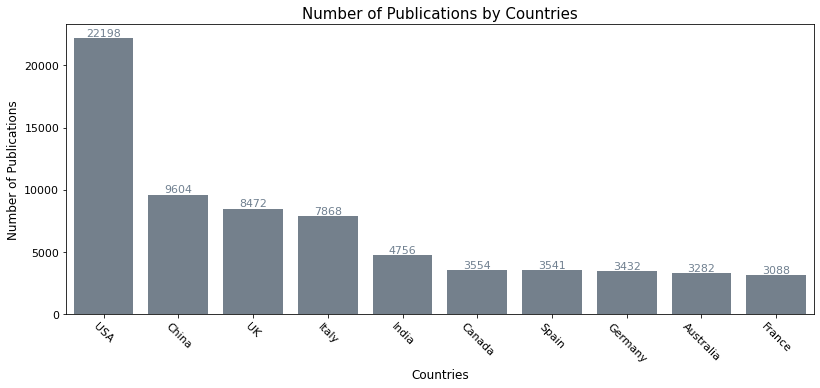

In [38]:
data_country_all = data_country.explode('replace')['replace'].value_counts().rename_axis('Countries').reset_index(name='Count')
data_country_10 = data_country_all[0:10]


plt.figure(figsize=(11.5,5.5))
g=sns.barplot(x=data_country_10.Countries, y=data_country_10.Count, color='slategrey')
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45)
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')

plt.title('Number of Publications by Countries', fontsize=15)
plt.tight_layout()
plt.savefig('doc_country.jpg')
plt.show()

In [39]:
print(sorted(data_country_all.Countries.unique()))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua & Barbu', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'BELARUS', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia & Herceg', 'Botswana', 'Brazil', 'British Virgin Isl', 'Brunei', 'Brunei Darussal', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Cent Afr Republ', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Cote Ivoire', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'DEM REP CONGO', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Rep', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Island', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', '

In [40]:
len(data_country_all.Countries.unique())

202

In [41]:
country_distr_map=data_country_all.to_excel('country_distr_map.xlsx')

# By research area

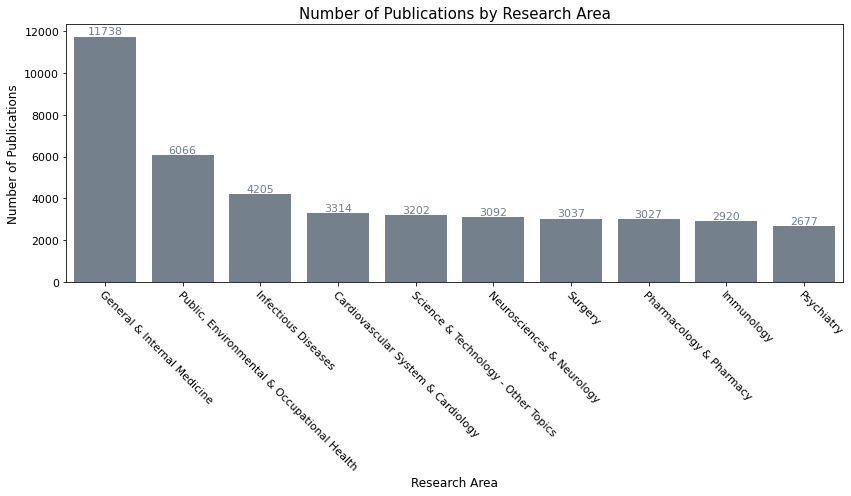

In [42]:
data_research = data[['SC']].dropna()
data_research.SC = data_research.SC.str.split('; ')
data_research_all = data_research.explode('SC').SC.value_counts().rename_axis('ResArea').reset_index(name='Count')[:10]

plt.figure(figsize=(12,7))
g=sns.barplot(x=data_research_all.ResArea, y=data_research_all.Count, color='slategrey')
plt.xlabel('Research Area',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45, ha='left', rotation_mode='anchor')
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')

plt.title('Number of Publications by Research Area', fontsize=15)
plt.tight_layout()
plt.savefig('doc_research.jpg')
plt.show()

In [43]:
len(data_research.explode('SC').SC.value_counts())

151

# By author keyword

In [44]:
data_keywords=data[['DE']].dropna()
data_keywords.DE = data_keywords.DE.str.split('; ')
data_keywords_full = data_keywords.explode('DE').DE.str.lower().value_counts().rename_axis('Author Keywords').reset_index(name='Count')
data_keywords_full.head(20)


,Author Keywords,Count
0,covid-19,29042
1,sars-cov-2,9194
2,coronavirus,6209
3,pandemic,3977
4,public health,1050
5,coronavirus disease 2019,944
6,mental health,931
7,epidemiology,797
8,covid-19 pandemic,787
9,pneumonia,781


# Author table

In [45]:
data_author = data[['AF']].dropna()
len(data_author.loc[data_author.AF == '[Anonymous]'])

869

In [46]:

data_author = data_author.loc[data_author.AF != '[Anonymous]']
data_author.AF = data_author.AF.str.split('; ')
data_author_all = data_author.explode('AF').AF.value_counts().rename_axis('AF').reset_index(name='Number of papers')

In [47]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [48]:
# Wroclawski, Marcelo L. | Wroclawski, Marcelo Langer
# Fang, Xinyu | Fang, Xin-Yu | 95
# Zhang, Chen | Zhang, Cen | 95
# Hellin, J. | Hellin, Jon | 89
# McKay, Dean | McKay, D. | 82
# Tibdewal, A. | Tibdewal, Anil | 87
# Leung, Wallace Woon Fong | Leung, Wallace Woon-Fong | 96
# Xu, Jingwen | Xu, Jing-Wen | 87
# Ke, Changwen | Ke, Chang-Wen | 88
# Yu, Qizhi | Yu, Qi-Zhi | 84
# Llamas-Velasco, M. | Llamas-Velasco, Mar | 92
# Chicharro, P. | Chicharro, Pablo | 83
# Rodriguez-Jimenez, P. | Rodriguez-Jimenez, Pedro | 89
# De Argila, D. | De Argila, Diego | 83
# Lopez-Fando, Luis | Lopez-Fando, L. | 88
# Chen, Ya-Jun | Chen, Yajun | 87
# Luo, Dan-Ju | Luo, Danju | 86
# Mastroianni, Claudio Maria | Mastroianni, Claudio M. | 90
# Mastroianni, Claudio Maria | Mastroianni, Claudio | 87
# Djiepmo-Njanang, Freddy-Joel | Djiepmo-Njanang, Freddy Joel | 96
# Schneider, E. Marion | Schneider, Marion | 92
# Case, James Brett | Case, James B. | 84
# Rodriguez-Jimenez, Pedro | Rodriguez-Jimenez, P. | 89
# Llamas-Velasco, Mar | Llamas-Velasco, M. | 92
# Carnero-Gonzalez, Lucia | Carnero Gonzalez, Lucia | 96
# Pegorari, Maycon S. | Pegorari, Maycon Sousa | 88
# Matos, Areolino P. | Matos, Areolino Pena | 89
# Nezamabadi, Sasan S. | Nezamabadi, Sasan Salehi | 86
# Lueers, Jan-Christoffer | Luers, Jan Christoffer | 93
# Nezamabadi, Sasan S. | Nezamabadi, Sasan Salehi | 86
# Sahajwalla, Chandrahas G. | Sahajwalla, Chandrahas | 94
# Roses-Gibert, Pau | Roses-Gibert, P. | 91
# Gimeno Castillo, Javier | Gimeno Castillo, J. | 86
# Saenz Aguirre, Amaia | Saenz Aguirre, A. | 86
# Carnero Gonzalez, Lucia | Carnero-Gonzalez, Lucia | 96
# Martinez de Lagran Alvarez de Arcaya, Zurine | Martinez de Lagran Alvarez de Arcaya, Z. | 93
# Gonzalez-Perez, Ricardo | Gonzalez-Perez, R. | 83
# Mitchell, William B. | Mitchell, William Beau | 90
# Olisova, Olga Yu | Olisova, Olga Y. | 94
# Srinivas, Sindhu | Srinivas, Sindhu K. | 91
# Torres, Angeli E. | Torres, Angeli Eloise | 84
# Islam, Md Sariful | Islam, Md Saiful | 97
# Islam, Md Sariful | Islam, Md. Saiful | 94
# Islam, Md Sariful | Islam, M. Saiful | 91
# Dhamoon, Mandip | Dhamoon, Mandip S. | 91
# Brock, Kathy L. | Brock, Kathy | 89
# Kiely, L. F. | Kiely, L. | 86
# Kiely, L. F. | Kiely, L. | 86
# Eustace, J. A. | Eustace, J. | 88
# Tam, Clarence C. | Tam, Clarence | 90
# Marais, Ben | Marais, Ben J. | 88
# Li, Jin-Yan | Liu, Jinyan | 82
# le Roux, Carel W. | Le Roux, Carel W. | 94
# Zhang, Xiao-Chun | Zhang, Xiaochun | 90
# Gao, Ya-Dong | Gao, Ya-dong | 92
# FitzGerald, Garret A. | FitzGerald, Garrett | 90
# Mok, Chris Ka Pun | Mok, Chris K. P. | 85
# Anderson, Evan | Anderson, Evan J. | 90
# Peiris, Malik | Peiris, J. S. Malik | 81
# Loman, Nick J. | Loman, Nick | 88
# Weiss, Daniel J. | Weiss, Daniel | 90
# Miller, Matthew S. | Miller, Matthew | 91
# Cummings, Derek A. T. | Cummings, Derek | 83
# Dell'Omo, Roberto | dell'Omo, Roberto | 94
# Akdis, Cezmi A. | Akdis, Cezmi | 89
# Kumar, Deepak S. | Kumar, Deepak | 90
# Wong, Timothy C. | Wang, Timothy C. | 94
# Friedman, David | Friedman, David E. | 91
# Mastroianni, Claudio | Mastroianni, Claudio M. | 93
# McNamara, Donna Marie | McNamara, Donna | 83
# Haque, Sk. Mafizul | Haque, Sk Mafizul | 97
# Olisova, Olga Y. | Olisova, Olga Yu | 94
# Poland, Gregory | Poland, Gregory A. | 91
# Van Cott, Elizabeth | Van Cott, Elizabeth M. | 93
# Cunningham, Louise | Cunningham, Louise S. | 92
# Khosravi, I | Khosravi, Ismail | 81
# Liebensteiner, M. | Liebensteiner, M. C. | 92
# Ferraro, Anna | Ferraro, A. | 83
# Wiwanitkit, V. | Wiwanitkit, Viroj | 84
# Burmester, Gerd | Burmester, Gerd R. | 91
# Benitez-del-Castillo, Jose M. | Benitez-Del-Castillo, Jose M. | 97
# Hossain, M. Anwar | Hossain, Md Anwar | 94
# Wang, Zhen-ning | Wang, Zhenning | 97
# Qian, Zhaoxin | Qian, Zhao-xin | 96
# Lueers, Jan-Christoffer | Luers, Jan Christoffer | 93
# Segal, Jonathan P. | Segal, Jonathan | 91
# Valverde, Eduardo E. | Valverde, Eduardo | 92
# Van Cott, Elizabeth | Van Cott, Elizabeth M. | 93
# Haque, Sk. Mafizul | Haque, Sk Mafizul | 97
# Mofenson, Lynne | Mofenson, Lynne M. | 91
# Chen, Pei-Liang | Chen Pei-Liang | 97
# Jimenez, Maria Jose | Jimenez, Maria-Jose | 95
# Mohammadi, Mostafa | Mohammdi, Mostafa | 97



In [49]:
# te_l = list(set([i for j in list(data_author['AF']) for i in j]))
# for i in range(len(te_l)):
#   for j in range(len(te_l[i+1:])):
#     if (fuzz.ratio(te_l[i],te_l[j]) > 90) & (fuzz.ratio(te_l[i],te_l[j]) != 100):
#       print(te_l[i], '|',te_l[j], '|', fuzz.ratio(te_l[i], te_l[j]))

In [50]:
author_cited = data[['AF','Z9','SC']].dropna()
author_cited = author_cited.loc[author_cited.AF != '[Anonymous]']
author_cited.AF = author_cited.AF.str.split(';')
author_cited_all = author_cited.explode('AF').sort_values('Z9', ascending=False).drop(columns = 'SC').reset_index().drop(columns = 'index')
author_cited_all = author_cited_all[['AF', 'Z9']]
au_ci = author_cited_all.groupby('AF').sum().sort_values('Z9', ascending=False)
au_ci_1 = author_cited_all.groupby('AF').count().reset_index().rename(columns={'Z9':'Count'})
au_ci_per = pd.merge(au_ci, au_ci_1, on='AF', how='inner')
au_ci_per['Number cited per paper'] = au_ci_per['Z9']/au_ci_per['Count']
au_ci_per = au_ci_per.drop(columns=['Z9', 'Count']).sort_values('Number cited per paper', ascending=False)

author_tb = pd.merge(data_author_all, au_ci, on='AF', how='inner').dropna()
author_tb['Cited per paper'] = author_tb.Z9/author_tb['Number of papers']
author_tb = author_tb[['AF', 'Z9', 'Cited per paper', 'Number of papers']].rename(columns={'AF':'Author'})
author_tb.sort_values(by=['Z9', 'Cited per paper', 'Number of papers'], ascending=False).reset_index(drop=True).rename(columns={"Z9": "Total number cited"}).head(20)

,Author,Total number cited,Cited per paper,Number of papers
0,"Huang, Chaolin",10528,809.846154,13
1,"Guan, W.",6486,6486.000000,1
2,"Wang, Dawei",6003,667.000000,9
3,"Zhu, Na",5605,1401.250000,4
4,"Zhou, Fei",5568,696.000000,8
5,"Chen, Nanshan",5354,1784.666667,3
6,"Zhou, Peng",4366,207.904762,21
7,"Li, Qun",3530,1176.666667,3
8,"Chan, Jasper Fuk-Woo",3491,96.972222,36
9,"Hoffmann, Markus",3317,331.700000,10


# Most cited papers

In [51]:
data[['TI', 'SC', 'Z9']].dropna().sort_values('Z9', ascending=False).reset_index(drop=True).head(10)

,TI,SC,Z9
0,Clinical features of patients infected with 20...,General & Internal Medicine,10528
1,Clinical Characteristics of Coronavirus Diseas...,General & Internal Medicine,6486
2,Clinical Characteristics of 138 Hospitalized P...,General & Internal Medicine,5925
3,A Novel Coronavirus from Patients with Pneumon...,General & Internal Medicine,5596
4,Clinical course and risk factors for mortality...,General & Internal Medicine,5556
5,Epidemiological and clinical characteristics o...,General & Internal Medicine,5354
6,A pneumonia outbreak associated with a new cor...,Science & Technology - Other Topics,4365
7,"Early Transmission Dynamics in Wuhan, China, o...",General & Internal Medicine,3530
8,Characteristics of and Important Lessons From ...,General & Internal Medicine,3171
9,SARS-CoV-2 Cell Entry Depends on ACE2 and TMPR...,Biochemistry & Molecular Biology; Cell Biology,3030


# Number of authors per paper (-anonymous)

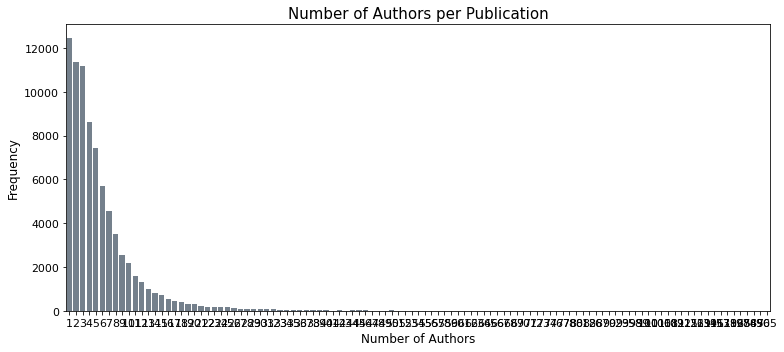

In [52]:
data_author_wo_anony = data_author.loc[data_author.AF != '[Anonymous]']
author_per_ppr = data_author_wo_anony.AF.apply(lambda x: len(x))
author_per_ppr_df = author_per_ppr.value_counts().rename_axis('Number of Authors').reset_index(name='Count').sort_values('Number of Authors')

plt.figure(figsize=(11,5))
g=sns.barplot(x=author_per_ppr_df['Number of Authors'],y=author_per_ppr_df['Count'], color='slategrey')
plt.xlabel('Number of Authors',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Number of Authors per Publication', fontsize=15)
plt.tight_layout()
plt.savefig('author_per_ppr.jpg')
plt.show()

# By month

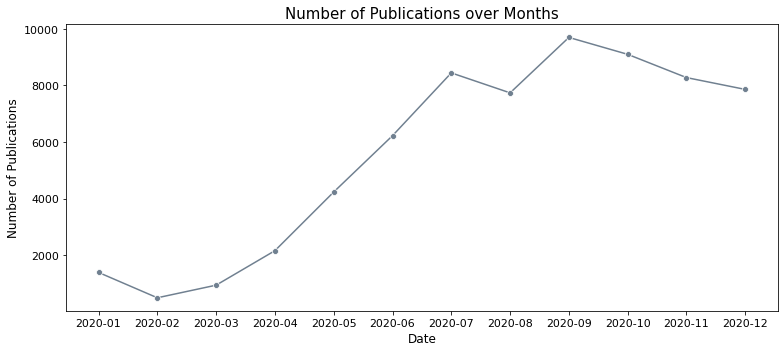

In [53]:
date_count = data_w_date.sort_values(by = 'PD').groupby('PD').size().rename_axis('Date').reset_index(name='Count')
plt.figure(figsize=(11,5))
g=sns.lineplot(x=date_count.Date, y=date_count.Count, color='slategrey', marker='o')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Number of Publications over Months', fontsize=15)
plt.tight_layout()
plt.savefig('date_count.jpg')
plt.show()

# By country over month

In [54]:
country_month = data_w_date[['C1', 'PD']].dropna()
country_month.C1 = country_month.C1.apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
country_month['country']=[list(set(i)) for i in [[j.split(', ')[-1] for j in i] for i in country_month.C1]]     
country_month['replace'] = [[replace(i) for i in j] for j in country_month['country']]
country_month['replace'] = [list(set(i)) for i in country_month['replace']]                                                 
country_month_all = country_month.explode('replace').drop(columns=['C1','country'])
country_month_all['num']=1
country_month_10 = country_month_all[country_month_all['replace'].isin(data_country_10['Countries'].to_list())].groupby(['PD','replace']).count().reset_index()


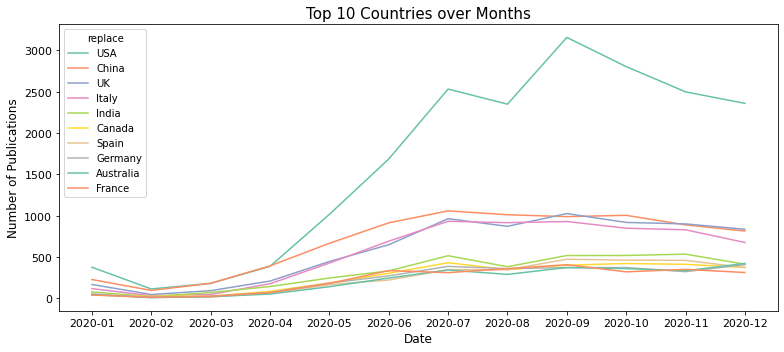

In [55]:

plt.figure(figsize=(11,5))
sns.lineplot(x=country_month_10['PD'], y=country_month_10['num'], hue=country_month_10['replace'],
            hue_order=data_country_10.Countries.to_list(),
            palette='Set2')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Top 10 Countries over Months', fontsize=15)
plt.tight_layout()
plt.savefig('country_month_10.jpg')
plt.show()


# Source over month

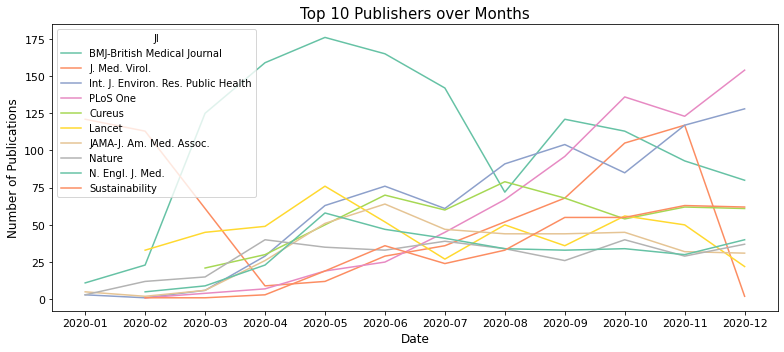

In [56]:
pub_month = data_w_date[['JI', 'PD']].dropna()
pub_month['Number']=1
pub_month_count_10 = pub_month[pub_month['JI'].isin(data_source['Title'].to_list())].groupby(['PD','JI']).count().reset_index()

plt.figure(figsize=(11,5))
sns.lineplot(x=pub_month_count_10['PD'], y=pub_month_count_10['Number'], hue=pub_month_count_10['JI'],
            hue_order=data_source['Title'].to_list(),
            palette='Set2')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Top 10 Publishers over Months', fontsize=15)
plt.tight_layout()
plt.savefig('publisher_month.jpg')
plt.show()

# Research area over month

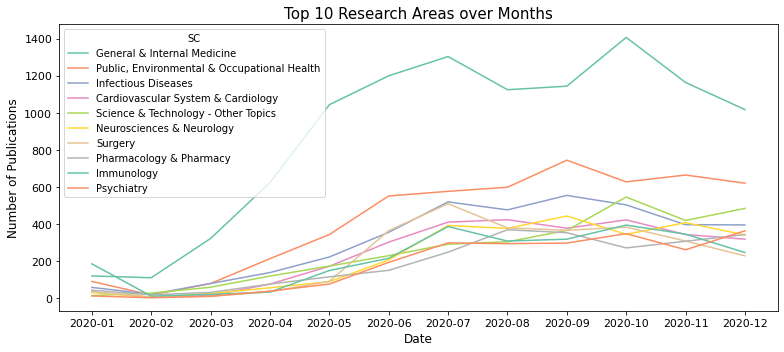

In [57]:
research_month = data_w_date[['SC','PD']].dropna()
research_month['SC'] = research_month['SC'].str.split('; ')
research_month_all = research_month.explode('SC')
research_month_all['num']=1
research_month_10 = research_month_all[research_month_all.SC.isin(data_research_all['ResArea'].to_list())].groupby(['PD','SC']).count().reset_index()

plt.figure(figsize=(11,5))
sns.lineplot(x=research_month_10['PD'], y=research_month_10['num'], 
             hue=research_month_10['SC'],
            hue_order=data_research_all['ResArea'].to_list(),
            palette='Set2')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Top 10 Research Areas over Months', fontsize=15)
plt.tight_layout()
plt.savefig('research_month.jpg')
plt.show()


# Keyword viz

In [58]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [59]:
def get_full_keywords(data_selected):
    data_selected['tok_title'] = [word_tokenize(title) for title in data_selected['TI']]
    data_selected['tok_abstract'] = [word_tokenize(title) for title in data_selected['AB']]
    stop_words=set(stopwords.words("english")+list(string.punctuation)+list(string.digits))
    data_selected['text']=data_selected['tok_title']+data_selected['tok_abstract']
    
    filtered_texts=[]
    for t in data_selected['text']:
        filtered_text=[]
        for word in t:
            if word.lower() not in stop_words:
                filtered_text.append(word)
        filtered_texts.append(filtered_text)

    keywords_text = [[item.lower() for item in sublist] for sublist in filtered_texts]
    kl = [x for sub in keywords_text for x in sub]
    
    keys_dist_20 = Counter(kl)
    return keys_dist_20

In [60]:
cloud = data[['TI','AB']].dropna()
key_freq = get_full_keywords(cloud)

In [61]:
key_freq.most_common(50)

[('covid-19', 157673),
 ('patients', 76567),
 ('pandemic', 54637),
 ('disease', 40943),
 ('sars-cov-2', 40943),
 ('coronavirus', 39028),
 ('health', 36688),
 ('study', 31161),
 ('infection', 25988),
 ('2020', 23821),
 ('clinical', 23807),
 ('results', 23537),
 ('severe', 22188),
 ('care', 22016),
 ('respiratory', 21283),
 ('2019', 20777),
 ('data', 20567),
 ('risk', 19988),
 ('may', 19156),
 ('cases', 18684),
 ('acute', 16365),
 ('treatment', 16007),
 ('also', 15607),
 ('virus', 15423),
 ('social', 14943),
 ('using', 14491),
 ('methods', 13855),
 ('analysis', 13313),
 ('associated', 13249),
 ('syndrome', 13145),
 ('use', 12957),
 ('p', 12735),
 ('public', 12603),
 ('among', 12585),
 ('new', 12395),
 ('time', 12279),
 ('used', 12263),
 ("'s", 12156),
 ('impact', 12094),
 ('symptoms', 11816),
 ('studies', 11585),
 ('outbreak', 11563),
 ('review', 11511),
 ('viral', 11457),
 ('patient', 11359),
 ('research', 11243),
 ('measures', 11056),
 ('mortality', 11029),
 ('potential', 10887),
 ('95

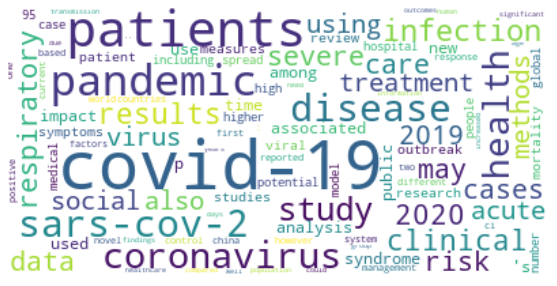

In [62]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate_from_frequencies(key_freq)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cloud_all.jpg')
plt.show()

In [63]:
data_1_4 = data_w_date.loc[data_w_date.PD <= '2020-04']
data_5_8 = data_w_date.loc[(data_w_date.PD > '2020-04') & (data_w_date.PD <= '2020-08')]
data_9_12 = data_w_date.loc[(data_w_date.PD > '2020-08') & (data_w_date.PD <= '2020-12')]

cloud_1_4 = data_1_4[['TI','AB']].dropna()
key_freq_1_4 = get_full_keywords(cloud_1_4)
cloud_5_8 = data_5_8[['TI','AB']].dropna()
key_freq_5_8 = get_full_keywords(cloud_5_8)
cloud_9_12 = data_9_12[['TI','AB']].dropna()
key_freq_9_12 = get_full_keywords(cloud_9_12)

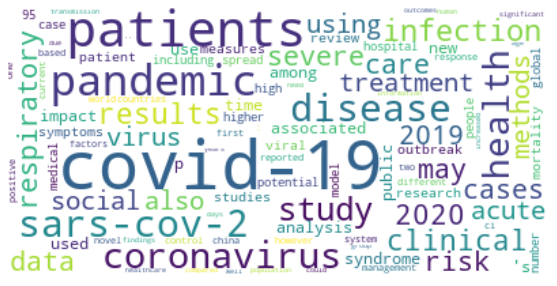

In [64]:
wordcloud_1_4 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate_from_frequencies(key_freq_1_4)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cloud_1_4.jpg')
plt.show()

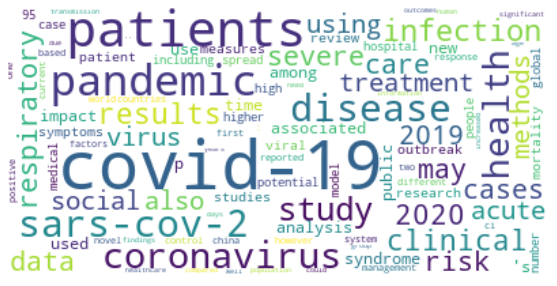

In [65]:
wordcloud_5_8 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate_from_frequencies(key_freq_5_8)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cloud_5_8.jpg')
plt.show()

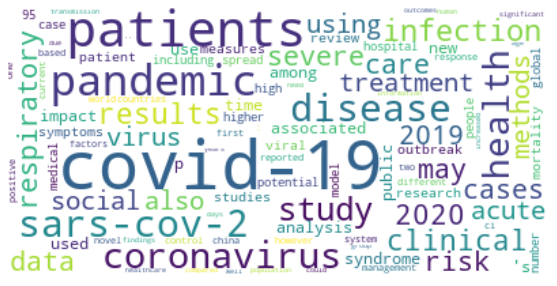

In [66]:
wordcloud_9_12 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate_from_frequencies(key_freq_9_12)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cloud_9_12.jpg')
plt.show()

# Corr

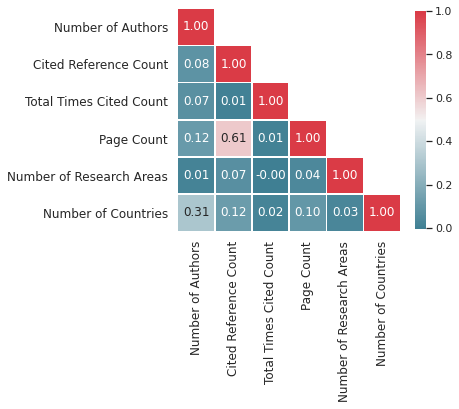

In [67]:
corr_ana = data[['AF', 'NR', 'Z9', 'PG', 'SC', 'C1']].dropna()
corr_ana['Number of Authors']=corr_ana['AF'].str.split(';').apply(lambda x: len(x))
corr_ana['Number of Research Areas']=corr_ana['SC'].str.split(';').apply(lambda x: len(x))
corr_ana['addresses'] = corr_ana['C1'].apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
country_replace_corr = [[i.replace('North Ireland', 'UK').replace('Wales','UK').replace('Scotland', 'UK').replace('England', 'UK').replace('Czech Republic','Czech') 
for i in x] for x in corr_ana['addresses']]
corr_ana['country_whole']=[list(set(i)) for i in [[j.split()[-1] for j in i] for i in country_replace_corr]]
corr_ana['Number of Countries'] = corr_ana['country_whole'].apply(lambda x: len(x))

corr= corr_ana[['Number of Authors', 'NR', 'Z9', 'PG', 'Number of Research Areas', 'Number of Countries']].rename(
    columns={"NR": "Cited Reference Count", "Z9": "Total Times Cited Count", "PG": "Page Count"}).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True
sns.set(style="white")

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, annot=True, fmt = '.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax )

locs, labels = plt.yticks();
g.set_yticklabels(labels, rotation=0, size='medium')
locs, labels = plt.xticks();
g.set_xticklabels(labels, rotation=90, size='medium')
plt.savefig('corr.jpg')
plt.show()

# h-, g-index

In [68]:
def h_index(li):
    li_sorted=sorted(li, reverse=True)
    for i in li_sorted:
        if i < li_sorted.index(i)+1:
            break
    return li_sorted.index(i)

def g_index(li):
    li_sorted=sorted(li, reverse=True)
    for i in li_sorted:
        if sum(li_sorted[:li_sorted.index(i)+1])<(li_sorted.index(i)+1)**2:
            break
    return li_sorted.index(i)+1

In [69]:
data_author_index = data[['AF', 'Z9']].dropna()
data_author_index = data_author_index.loc[data_author_index.AF != '[Anonymous]']

data_author_index['Authors'] = data_author_index['AF'].str.split(';')
data_author_index_sep = data_author_index.explode('Authors').reset_index().drop(columns=['index','AF'])
data_author_index_sep=data_author_index_sep[['Authors','Z9' ]]
data_h=data_author_index_sep.groupby('Authors').agg(lambda x: list(x)).reset_index()
data_h['h_index']= data_h['Z9'].apply(h_index)
h_index_top10 = data_h.sort_values('h_index',ascending=False).drop(columns='Z9').reset_index(drop=True).head(20)
data_h['g_index']= data_h['Z9'].apply(g_index)
g_index_top10 = data_h.sort_values(['h_index','g_index'],ascending=False).drop(columns='Z9').reset_index(drop=True).head(20)
g_index_top10

,Authors,h_index,g_index
0,"Liu, Lei",26,48
1,"Drosten, Christian",22,35
2,"Wang, Wei",20,50
3,"Baric, Ralph S.",20,38
4,"Zhang, Wei",19,47
5,"Yuen, Kwok-Yung",18,46
6,"Lippi, Giuseppe",18,28
7,"Wang, Ying",17,44
8,"Zhang, Zheng",17,23
9,"Lippi, Giuseppe",16,46


# Deg of collab

In [70]:
colab_month_w_anonymous = data_w_date[['PD', 'AF']].dropna()
colab_month = colab_month_w_anonymous.loc[colab_month_w_anonymous['AF'] !='[Anonymous]'].copy()
colab_month[['AF']]=colab_month[['AF']].applymap(list)
colab_month['AF'] = colab_month['AF'].apply(lambda x: ';' in x).astype('int')

colab_month_sep=colab_month.groupby('PD')['AF'].value_counts().rename_axis(['Date','sin/mul']).reset_index(name='Count')
deg_colab_pivot = colab_month_sep.pivot(index='Date', columns='sin/mul', values='Count').fillna(0).reset_index()
deg_colab_pivot['deg_colab']=deg_colab_pivot[1]/(deg_colab_pivot[0]+deg_colab_pivot[1])
deg_colab_pivot

sin/mul,Date,0,1,deg_colab
0,2020-01,189,1198,0.863735
1,2020-02,99,384,0.795031
2,2020-03,307,608,0.664481
3,2020-04,573,1491,0.722384
4,2020-05,1043,3068,0.746290
5,2020-06,1117,5004,0.817513
6,2020-07,1373,6948,0.834996
7,2020-08,1052,6619,0.862860
8,2020-09,1443,8186,0.850140
9,2020-10,1115,7909,0.876441


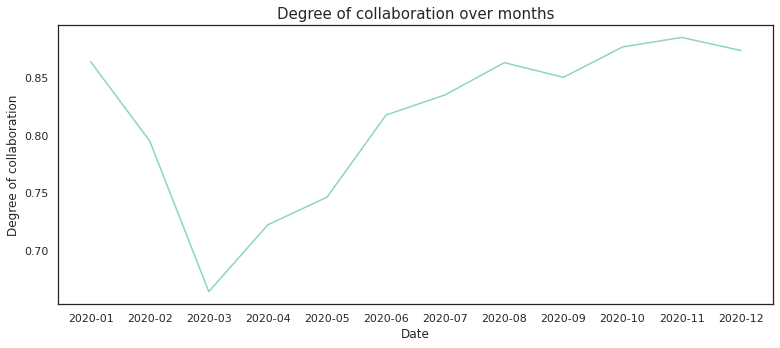

In [71]:
with plt.style.context({'axes.prop_cycle' : plt.cycler('color', plt.cm.Set3.colors)}):
    plt.figure(figsize=(11,5))
    sns.lineplot(x=deg_colab_pivot['Date'], y=deg_colab_pivot['deg_colab'],
            #hue_order=deg_colab_pivot.sort_values(by=['Date'])['Funding'].tolist(),
            palette='Set2')

    plt.xlabel('Date',fontsize=12)
    plt.ylabel('Degree of collaboration',fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.title('Degree of collaboration over months', fontsize=15)
    plt.tight_layout()
    plt.savefig('deg_colab.pdf')
    plt.show()

# International collab & Research area

In [72]:
int_colab = data_w_date[['PD','C1']].dropna()
int_colab['C1'] = int_colab['C1'].apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
int_colab['country_whole']=[list(set(i)) for i in [[j.split(', ')[-1] for j in i] for i in int_colab['C1']]]
int_colab['replace'] = [[replace(i) for i in j] for j in int_colab['country_whole']]
int_colab['replace'] = [list(set(i)) for i in int_colab['replace']]
int_colab['num_country'] = int_colab['replace'].apply(lambda x: len(x))
int_colab.loc[int_colab['num_country']>1, 'num_country'] = 2
int_colab_counts = int_colab.groupby('PD')['num_country'].value_counts().rename_axis(['date','collab']).reset_index(name='Count').pivot(index='date', columns='collab', values='Count').fillna(0).reset_index()
int_colab_counts['percentage_inter_colab']=int_colab_counts[2]/(int_colab_counts[1]+int_colab_counts[2])
int_colab_counts


collab,date,1,2,percentage_inter_colab
0,2020-01,1067,287,0.211965
1,2020-02,330,97,0.227166
2,2020-03,532,192,0.265193
3,2020-04,1357,415,0.234199
4,2020-05,2838,874,0.235453
5,2020-06,4441,1325,0.229795
6,2020-07,6146,1754,0.222025
7,2020-08,5687,1690,0.229090
8,2020-09,7233,1980,0.214914
9,2020-10,6668,1860,0.218105


In [73]:
ra_sm = data_w_date[['PD','SC']].dropna()
ra_sm['SC'] = ra_sm['SC'].str.split(';')
ra_sm['cnt'] = ra_sm['SC'].apply(lambda x: len(x))

ra_sm.loc[ra_sm['cnt']>1, 'cnt'] = 2
ra_sm_counts = ra_sm.groupby('PD')['cnt'].value_counts().rename_axis(['date','ra']).reset_index(name='Count').pivot(index='date', columns='ra', values='Count').fillna(0).reset_index()
ra_sm_counts['percentage_multi_disp']=ra_sm_counts[2]/(ra_sm_counts[1]+ra_sm_counts[2])
ra_sm_counts

ra,date,1,2,percentage_multi_disp
0,2020-01,895,496,0.356578
1,2020-02,406,89,0.179798
2,2020-03,749,192,0.204038
3,2020-04,1772,388,0.179630
4,2020-05,3202,1032,0.243741
5,2020-06,4597,1628,0.261526
6,2020-07,6098,2347,0.277916
7,2020-08,5393,2346,0.303140
8,2020-09,6777,2922,0.301268
9,2020-10,6316,2785,0.306010


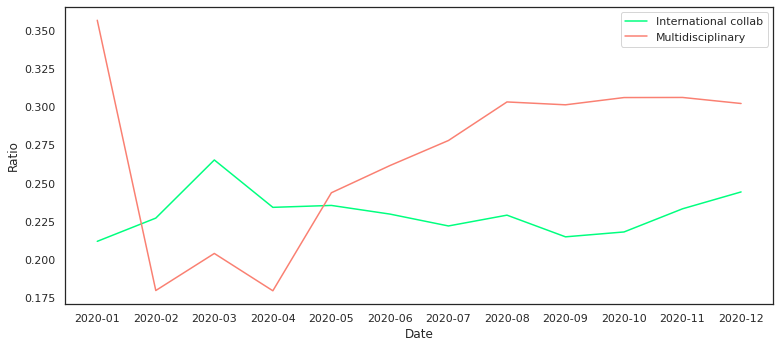

In [74]:
with plt.style.context({'axes.prop_cycle' : plt.cycler('color', plt.cm.Set3.colors)}):
    plt.figure(figsize=(11,5))
    sns.lineplot(x=int_colab_counts['date'], y=int_colab_counts['percentage_inter_colab'], label='International collab', color = 'springgreen')
    sns.lineplot(x=ra_sm_counts['date'], y=ra_sm_counts['percentage_multi_disp'], label='Multidisciplinary', color = 'salmon')
    plt.xlabel('Date',fontsize=12)
    plt.ylabel('Ratio',fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend()
    plt.tight_layout()
    plt.savefig('int_colab_ratio.jpg')
    plt.show()

# summary tb

In [75]:
sum_tb = data[['SC', 'NR', 'Z9']].dropna().reset_index(drop=True)
sum_tb['SC'] = sum_tb['SC'].str.split(';')
sum_tb_full = sum_tb.explode('SC')
sum_tb_full['cnt']=1
sum_group = sum_tb_full.groupby('SC').sum()
sum_group['Cited Reference Count per']=sum_group['NR']/sum_group['cnt']
sum_group['Times Cited per']=sum_group['Z9']/sum_group['cnt']
sum_group.sort_values(by=['Times Cited per'], ascending=False).head(20)

,NR,Z9,cnt,Cited Reference Count per,Times Cited per
SC,,,,,
Cell Biology,23282,19745,599,38.868114,32.963272
Cardiovascular System & Cardiology,13641,12403,623,21.895666,19.908507
Life Sciences & Biomedicine - Other Topics,5159,2096,109,47.330275,19.229358
Microbiology,34541,22042,1169,29.547476,18.855432
Virology,9498,4194,241,39.410788,17.402490
General & Internal Medicine,190632,184110,11112,17.155508,16.568575
Infectious Diseases,54682,38034,2340,23.368376,16.253846
Immunology,90190,35798,2334,38.641817,15.337618
Virology,51675,22080,1514,34.131440,14.583884


In [76]:
sum_country = data[['C1', 'NR', 'Z9']].dropna().reset_index(drop=True)
sum_country['C1'] = sum_country['C1'].apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
sum_country['country_whole']=[list(set(i)) for i in [[j.split()[-1] for j in i] for i in sum_country['C1']]]                                                      
sum_country_full = sum_country.explode('country_whole').drop(columns='C1')
sum_country_full['num']=1
sum_country_g = sum_country_full.groupby('country_whole').sum()
sum_country_g['Cited Reference Count per'] = sum_country_g['NR']/sum_country_g['num']
sum_country_g['Times Cited per'] = sum_country_g['Z9']/sum_country_g['num']
sum_country_g.sort_values(by=['Times Cited per'], ascending=False).head(20)


,NR,Z9,num,Cited Reference Count per,Times Cited per
country_whole,,,,,
Congo,778,940,25,31.120000,37.600000
Honduras,629,788,25,25.160000,31.520000
China,283630,265298,9604,29.532486,27.623698
Guiana,180,276,12,15.000000,23.000000
Panama,1185,663,31,38.225806,21.387097
Ivoire,261,234,13,20.076923,18.000000
Bolivia,1585,697,39,40.641026,17.871795
Maldives,197,116,7,28.142857,16.571429
Senegal,1160,755,50,23.200000,15.100000


# Networkx

In [77]:
def to_network(matrix):
    unik=[]
    for i in matrix:
        for j in i:
            unik.append(j)
    keys=list(set(unik))

    dicti={}
    for key in keys:
        value=[]
        for sublist in matrix:
            if key in sublist:
                li = list(sublist)
                li.remove(key)
                value=value+list(set(li))        
        dicti[key]=value
        
    G = nx.Graph()
    for key, value in dicti.items():
        for i in list(value):
            G.add_edge(key, i, weight = value.count(i))       
    return G

In [78]:
matrix_author = list(data_author['AF'])
nw_author = to_network(matrix_author)

In [79]:
matrix_inst = list(data_inst['C1'])
nw_institute = to_network(matrix_inst)

In [ ]:
country_mtx_df = list(data_country['replace_1'])
nw_country = to_network(country_mtx_df)

In [81]:
matrix_ra = list(data_research['SC'])
nw_ra = to_network(matrix_ra)

In [82]:
matrix_kwd = [[i.lower() for i in j ]for j in data_keywords.DE]
nw_kwd = to_network(matrix_kwd)

# Centrality author

In [83]:
def centrality(G):
    largest_cc = max(nx.connected_components(G), key=len)
    S = G.subgraph(largest_cc).copy()   
    bet_cen = nx.betweenness_centrality(S)
    pagerank = nx.pagerank(S)
    betweeness = pd.DataFrame(sorted(bet_cen.items(), key=lambda item: item[1], reverse=True), columns=['Name','betweeness']).reset_index(drop=True)
    pgrk = pd.DataFrame(sorted(pagerank.items(), key=lambda item: item[1], reverse=True), columns=['Name','pagerank']).reset_index(drop=True)
    return pd.merge(betweeness,pgrk,on='Name',how='outer').sort_values(by=['betweeness','pagerank'], ascending=False).head(10)

In [84]:
centrality_au = centrality(nw_author)
centrality_au.to_excel('/content/drive/MyDrive/cen_au.xlsx')
centrality_au


KeyboardInterrupt: ignored

In [ ]:
nx.number_connected_components(nw_author)

In [ ]:
[len(c) for c in sorted(nx.connected_components(nw_author), key=len, reverse=True)][:10]

In [ ]:

largest_au_cc = [c for c in max(nx.connected_components(nw_author), key=len)]
count=0
for i in centrality_au.Name:
  if i in largest_au_cc:
    count+=1
count

In [ ]:
len(max(nx.connected_components(nw_author), key=len))/len(nw_author)

In [ ]:
#check most important authors belong to what communities

# Centrality institute

In [ ]:
centrality_inst = centrality(nw_institute)
centrality_inst.to_excel('/content/drive/MyDrive/cen_inst.xlsx')
centrality_inst

In [ ]:
nx.number_connected_components(nw_institute)

In [ ]:
[len(c) for c in sorted(nx.connected_components(nw_institute), key=len, reverse=True)][:10]

In [ ]:
largest_ins_cc = [c for c in max(nx.connected_components(nw_institute), key=len)]
count_ins=0
for i in centrality_inst.Name:
  if i in largest_ins_cc:
    count_ins+=1
count_ins

# Centrality country

In [85]:
centrality_country = centrality(nw_country)
centrality_country.to_excel('/content/drive/MyDrive/cen_cntry.xlsx')
centrality_country

,Name,betweeness,pagerank
0,USA,0.095965,0.114464
1,France,0.060142,0.028441
2,UK,0.040757,0.057596
3,Australia,0.038171,0.027795
4,Italy,0.025742,0.040405
5,China,0.024672,0.030558
6,Spain,0.023083,0.026712
7,Pakistan,0.021749,0.007947
8,India,0.019155,0.020479
9,Switzerland,0.018744,0.021793


In [86]:
nx.number_connected_components(nw_country)

1

In [87]:
[len(c) for c in sorted(nx.connected_components(nw_country), key=len, reverse=True)]

[198]

# Co-author

In [88]:
co_author = pd.DataFrame(sorted(nw_author.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:20])
co_author.to_excel('/content/drive/MyDrive/co_author.xlsx')
co_author

,0,1,2
0,"Hasan, Syed Shahzad","Kow, Chia Siang",{'weight': 35}
1,"Joob, Beuy","Wiwanitkit, Viroj",{'weight': 35}
2,"Yuen, Kwok-Yung","Chan, Jasper Fuk-Woo",{'weight': 33}
3,"Lechien, Jerome R.","Saussez, Sven",{'weight': 31}
4,"Yuen, Kwok-Yung","To, Kelvin Kai-Wang",{'weight': 31}
5,"Dhama, Kuldeep","Rodriguez-Morales, Alfonso J.",{'weight': 31}
6,"Lippi, Giuseppe","Henry, Brandon Michael",{'weight': 30}
7,"Dhama, Kuldeep","Tiwari, Ruchi",{'weight': 29}
8,"Zhao, Shi","He, Daihai",{'weight': 29}
9,"Grover, Sandeep","Sahoo, Swapnajeet",{'weight': 28}


In [89]:
nx.number_of_edges(nw_author)

2583357

In [90]:
nx.number_of_selfloops(nw_author)

162

In [91]:
nx.number_of_nodes(nw_author)

290925

In [92]:
#isolated nodes
len(set([i for j in matrix_author for i in j]))-nx.number_of_nodes(nw_author)

7640

# co-occur institutions


In [93]:
co_institutions = pd.DataFrame(sorted(nw_institute.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:20])
co_institutions.to_excel('/content/drive/MyDrive/co_institutions.xlsx')
co_institutions

,0,1,2
0,Huazhong Univ Sci & Technol,Huazhong Univ Sci & Technol,{'weight': 537}
1,Wuhan Univ,Wuhan Univ,{'weight': 361}
2,Univ Toronto,Univ Toronto,{'weight': 332}
3,Harvard Med Sch,Harvard Med Sch,{'weight': 264}
4,Harvard Med Sch,Massachusetts Gen Hosp,{'weight': 234}
5,Univ Tehran Med Sci,Univ Tehran Med Sci,{'weight': 219}
6,Univ Milan,Univ Milan,{'weight': 204}
7,Brigham & Womens Hosp,Harvard Med Sch,{'weight': 203}
8,Columbia Univ,Columbia Univ,{'weight': 201}
9,Univ Penn,Univ Penn,{'weight': 196}


In [94]:
nx.number_of_selfloops(nw_institute)

7868

In [95]:
nx.number_of_edges(nw_institute)

524881

In [96]:
nx.number_of_nodes(nw_institute)

48745

In [97]:
#isolated nodes
len(set([i for j in matrix_inst for i in j]))-nx.number_of_nodes(nw_institute)

2767

# node: country

In [98]:
co_country = pd.DataFrame(sorted(nw_country.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:20])
co_country.to_excel('/content/drive/MyDrive/co_country.xlsx')
co_country

,0,1,2
0,USA,USA,{'weight': 10720}
1,UK,USA,{'weight': 1554}
2,China,USA,{'weight': 1490}
3,Italy,USA,{'weight': 1146}
4,Canada,USA,{'weight': 1116}
5,Italy,UK,{'weight': 895}
6,Australia,USA,{'weight': 794}
7,Germany,USA,{'weight': 699}
8,UK,Australia,{'weight': 652}
9,UK,China,{'weight': 639}


In [99]:
nx.number_of_selfloops(nw_country)

2

In [100]:
nx.number_of_edges(nw_country)

6367

In [101]:
nx.number_of_nodes(nw_country)

198

In [102]:
len(set([i for j in country_mtx_df for i in j]))-nx.number_of_nodes(nw_country)

4

# co-occurrence of research area

In [103]:
co_occur_ra = pd.DataFrame(sorted(nw_ra.edges(data=True),key= lambda x: x[2]['weight'],reverse=True))[:20]
co_occur_ra.to_excel('/content/drive/MyDrive/co_occur_ra.xlsx')
co_occur_ra

,0,1,2
0,Environmental Sciences & Ecology,"Public, Environmental & Occupational Health",{'weight': 907}
1,Immunology,Infectious Diseases,{'weight': 882}
2,"Public, Environmental & Occupational Health",Infectious Diseases,{'weight': 880}
3,Microbiology,Infectious Diseases,{'weight': 827}
4,Microbiology,Immunology,{'weight': 655}
5,Psychology,Psychiatry,{'weight': 601}
6,Biochemistry & Molecular Biology,Cell Biology,{'weight': 562}
7,Respiratory System,General & Internal Medicine,{'weight': 530}
8,Medical Informatics,Health Care Sciences & Services,{'weight': 443}
9,Science & Technology - Other Topics,Environmental Sciences & Ecology,{'weight': 416}


In [104]:
nx.number_of_edges(nw_ra)

1069

In [105]:
nx.number_of_selfloops(nw_ra)

0

In [106]:
nx.number_connected_components(nw_ra)

1

In [107]:
[len(c) for c in sorted(nx.connected_components(nw_ra), key=len, reverse=True)]

[150]

In [108]:
nx.number_of_nodes(nw_ra)

150

In [109]:
#isolated nodes
len(set([i for j in matrix_ra for i in j]))-nx.number_of_nodes(nw_ra)

1

# author keyword co-occurrence

In [110]:
co_occur_key = pd.DataFrame(sorted(nw_kwd.edges(data=True),key= lambda x: x[2]['weight'],reverse=True))[:20]
co_occur_key.to_excel('/content/drive/MyDrive/co_occur_key.xlsx')
co_occur_key

,0,1,2
0,covid-19,sars-cov-2,{'weight': 6921}
1,covid-19,coronavirus,{'weight': 4045}
2,covid-19,pandemic,{'weight': 2944}
3,sars-cov-2,coronavirus,{'weight': 1587}
4,pandemic,coronavirus,{'weight': 895}
5,covid-19,mental health,{'weight': 665}
6,sars-cov-2,pandemic,{'weight': 654}
7,covid&#8208,19,{'weight': 634}
8,covid-19,public health,{'weight': 609}
9,covid-19,anxiety,{'weight': 544}


# small-world

In [147]:
len(max(nx.connected_components(nw_author), key=len))

185251

In [149]:
largest_cc = max(nx.connected_components(nw_author), key=len)
S = nw_author.subgraph(largest_cc).copy()
nx.average_shortest_path_length(S)

KeyboardInterrupt: ignored

In [148]:
import math
math.log(len(max(nx.connected_components(nw_author), key=len)))

12.129466941254424

# Scale-free

In [111]:
!pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24788 sha256=c1fb46108aadfc392a0c2dfd9cf6e9e5e3ed480eaa8df08a0dcf3c37394e7f6b
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [112]:
import powerlaw

In [113]:
degree_sequence = sorted([d for n, d in nw_author.degree()], reverse=True)
len_deg_seq = len(degree_sequence)

In [114]:
fit = powerlaw.Fit(degree_sequence)

Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


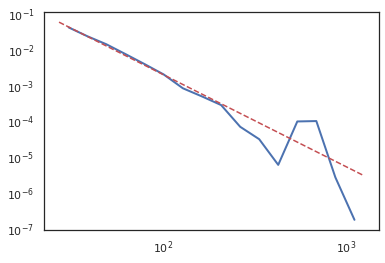

In [115]:
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig2)

In [116]:
deg_occur = []
for i in degree_sequence:
  num = degree_sequence.count(i)
  deg_occur.append(num)

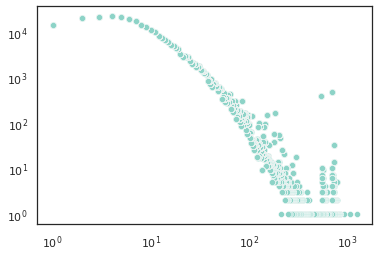

In [117]:
with plt.style.context({'axes.prop_cycle' : plt.cycler('color', plt.cm.Set3.colors)}):
  f, ax = plt.subplots()
  ax.set(xscale="log", yscale="log")
  sns.scatterplot(x=degree_sequence, y=deg_occur, ax=ax)


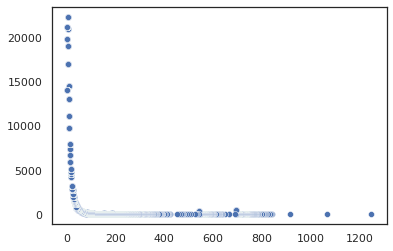

In [118]:
f, ax = plt.subplots()

sns.scatterplot(x=degree_sequence, y=deg_occur)

# assort co-author ntw (double check this section)

In [119]:
sub_nw_author_component = [nw_author.subgraph(c).copy() for c in sorted(nx.connected_components(nw_author), key=len, reverse=True)]
assort_l = []
avg_clustering = []
for k in sub_nw_author_component:
  r = nx.degree_assortativity_coefficient(k)
  clust = nx.average_clustering(k)
  assort_l.append(f"{r:3.1f}")
  avg_clustering.append(clust)

/usr/local/lib/python3.6/dist-packages/networkx/algorithms/assortativity/correlation.py:287: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [136]:
assort = [i.replace('nan', '100') for i in assort_l]
assortativity = [float(i) for i in assort]
weight_au_component_norm = [len(c)/len(nw_author) for c in sorted(nx.connected_components(nw_author), key=len, reverse=True)]
weight_au_component = [len(c) for c in sorted(nx.connected_components(nw_author), key=len, reverse=True)]


In [137]:
assort_non_nan = []
weight_au_component_non_nan = []
for i,j in zip(assortativity, weight_au_component):
  if i!=float(100):
    assort_non_nan.append(i)
    weight_au_component_non_nan.append(j)
print(assort_non_nan)

[0.9, 0.3, 0.5, 0.9, 0.1, 0.5, 0.2, -0.0, 0.7, 0.6, 0.1, 0.7, 0.6, 0.3, 0.1, 0.7, 0.0, 0.8, 0.6, -0.2, 0.8, 0.7, 0.2, 0.6, 0.2, -0.0, 0.7, 0.1, 0.5, -0.1, -0.0, 0.1, 0.5, 0.2, 0.4, -0.0, 0.7, 0.8, 0.7, -0.2, 0.6, 0.1, -0.1, 0.7, 0.1, 0.3, 0.4, -0.1, 0.0, -0.2, -0.1, 0.1, 0.7, -0.1, -0.2, -0.0, 0.9, 0.5, -0.1, 0.6, 0.8, 0.4, 0.3, 0.1, 0.1, -0.2, 0.3, 0.5, 0.7, 0.5, 0.2, -0.1, 0.6, 0.3, 0.6, 0.6, 0.4, 0.4, -0.0, 0.6, 0.4, 0.4, 0.5, 0.3, 0.6, 0.2, 0.1, -0.2, 0.1, 0.1, 0.2, 0.8, 0.6, 0.3, 0.3, 0.2, 0.1, 0.4, -0.1, 0.6, 0.7, -0.1, 0.1, -0.1, 0.2, -0.2, 0.4, 0.0, 0.0, 0.1, -0.1, 0.2, -0.1, 0.5, 0.1, -0.1, -0.2, -0.0, 0.0, -0.1, 0.6, 0.0, 0.6, -0.2, 0.0, 0.0, 0.3, -0.1, 0.6, -0.1, 0.1, 0.1, 0.3, -0.1, 0.4, 0.7, 0.3, 0.4, -0.2, 0.2, 0.3, 0.2, 0.6, 0.1, 0.1, 0.1, 0.3, -0.2, 0.7, -0.2, -0.2, 0.0, -0.0, 0.2, 0.6, -0.0, 0.4, 0.5, 0.6, -0.1, 0.5, 0.4, -0.0, 0.1, 0.0, -0.0, -0.0, 0.1, 0.1, 0.1, 0.1, -0.3, 0.6, 0.3, 0.1, 0.5, -0.2, 0.1, 0.0, 0.2, -0.0, 0.1, -0.1, 0.6, 0.6, -0.3, 0.3, -0.0, 0.2, -0.2,

In [138]:
print(weight_au_component_non_nan[-11:])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [139]:
print(assort_non_nan[-20:])
#component

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [140]:
len(assort_non_nan)

2861

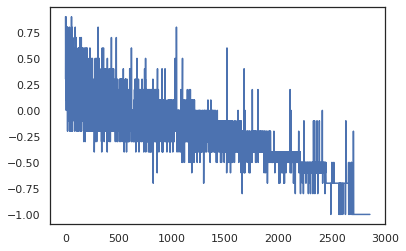

In [141]:
plt.plot(assort_non_nan)

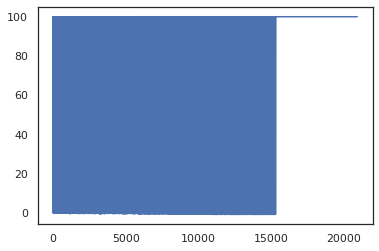

In [142]:
plt.plot(assortativity)
#change 100 to 0 in the above cell

In [143]:
sum(weight_au_component_non_nan)

217027

In [144]:
#removing nan assortativity components. weighted avg
product_1=[]
for i,j in zip(assort_non_nan, weight_au_component_non_nan):
  product_1.append(i*j/sum(weight_au_component_non_nan))
sum(product_1)

0.7558815262617077

In [145]:
sum(assort_non_nan)/len(assort_non_nan)

-0.28140510311080275

# clustering co-au

In [146]:
nx.average_clustering(nw_author)
#this is correct (local)

0.873278322870623